In [147]:
import sys 
from importlib import reload
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


sys.path.append( "../../utils")
import df_one_hot_encode


In [21]:
DATA_DIR = r"C:\_DATA\experimentation\HC_Default_Risk/"
app_fn = DATA_DIR + "application_train.csv"
# https://www.kaggle.com/c/home-credit-default-risk/data

df0 = pd.read_csv( app_fn )

#columns to lowercase 
df0.columns = [ col.lower() for col in df0.columns ]

desc = df0.describe().transpose()
#%%

In [66]:
df0 = df0.set_index( 'sk_id_curr')

In [47]:
df0.flag_own_car.value_counts()

N    202924
Y    104587
Name: flag_own_car, dtype: int64

In [46]:
df0.flag_own_realty.value_counts() 

Y    213312
N     94199
Name: flag_own_realty, dtype: int64

In [67]:
df1 = df0.copy()
del df1['organization_type'] # dropped because of too many values
df1['flag_own_car'] = df0['flag_own_car'] == 'Y'
df1['flag_own_realty'] = df0['flag_own_realty'] == 'Y'
cat_vars_0  = df1.dtypes[ df1.dtypes == 'object' ]
cat_vars_0

name_contract_type            object
code_gender                   object
name_type_suite               object
name_income_type              object
name_education_type           object
name_family_status            object
name_housing_type             object
occupation_type               object
weekday_appr_process_start    object
fondkapremont_mode            object
housetype_mode                object
wallsmaterial_mode            object
emergencystate_mode           object
dtype: object

In [68]:
reload( df_one_hot_encode )

oh_enc = df_one_hot_encode.DfOneHotEncoder( cat_vars_0.index )

oh_enc.fit( df1 )

In [71]:
df1 = oh_enc.transform( df1, drop_old=True )

In [87]:
# Convert flag columns to bool

for col in df1.columns :
    if col.startswith( 'flag_' ) or col.startswith( 'reg_') : 
        df1[col] = (df1[col] == 1)

In [134]:
# For float64 fill NaNs with median 
for col in df1.select_dtypes('float64').columns : 
    if df1[col].isnull().sum() > 0 :  
        median = df1[col].median() 
        df1[col] = df1[col].fillna(  median )

In [169]:
pd.set_option( 'display.max_columns', 200 )
pd.set_option( 'display.max_rows', 150 )

In [64]:
df1.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [92]:
df1[ df1.dtypes[df1.dtypes == 'float64'].index ].describe()


,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_registration,own_car_age,cnt_fam_members,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,104582.000000,307509.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-4986.120328,12.061091,2.152665,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,3522.886321,11.944812,0.910682,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-24672.000000,0.000000,1.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.3

In [204]:
train, test = train_test_split( df1, train_size = 0.8, test_size = 0.2 )
Y_train = train['target']
Y_test  = test['target']
X_train = train.loc[ : , train.columns != 'target']
X_test  = test .loc[ : , test.columns != 'target']

In [143]:
na_cnts = X_train.isnull().sum()
na_cnts[na_cnts > 0], Y_train.isnull().sum()

(Series([], dtype: int64), 0)

In [146]:
Y_test.mean()

0.08089036307172008

In [205]:
rfc = RandomForestClassifier( n_estimators=100, min_samples_split=50, min_samples_leaf=10, max_depth=12)
rfc.fit( X_train, Y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
def roc_auc_scorer( clf, X, y ) :
    y_pred = clf.predict_proba(X)[:,1]
    return roc_auc_score( y, y_pred )

In [206]:
roc_auc_scorer( rfc, X_train, Y_train ), roc_auc_scorer( rfc, X_test, Y_test )

(0.8179445391902889, 0.7420326468703633)

In [172]:
feat_imp = pd.DataFrame( {"column" : X_train.columns,
                          "importance" : rfc.feature_importances_ } 
                       ).sort_values( "importance", ascending = False)
feat_imp['cumsum'] = feat_imp['importance'].cumsum()
feat_imp['rank'] = len(feat_imp) - feat_imp['importance'].rank()
feat_imp

,column,importance,cumsum,rank
31,ext_source_3,1.735007e-01,0.173501,0.0
30,ext_source_2,1.585010e-01,0.332002,1.0
29,ext_source_1,5.723131e-02,0.389233,2.0
8,days_birth,3.641947e-02,0.425652,3.0
9,days_employed,3.085130e-02,0.456504,4.0
79,days_last_phone_change,2.480900e-02,0.481313,5.0
11,days_id_publish,2.314724e-02,0.504460,6.0
6,amt_goods_price,2.271417e-02,0.527174,7.0
4,amt_credit,2.042037e-02,0.547595,8.0
5,amt_annuity,1.858117e-02,0.566176,9.0


In [240]:
cols_inc = [ col for col in  list(feat_imp['column'].iloc[:90]) + ["target"]
                 if not col.startswith("ext_source_")  ]
train, test = train_test_split( df1[ cols_inc  ], train_size = 0.8, test_size = 0.2 )
y_train = train["target"]
y_test  = test["target"]
X_train = train.loc[ : , train.columns != 'target'].copy()
X_test  = test .loc[ : , test .columns != 'target'].copy()
train.columns

Index(['days_birth', 'days_employed', 'days_last_phone_change',
       'days_id_publish', 'amt_goods_price', 'amt_credit', 'amt_annuity',
       'days_registration', 'name_education_type__higher_education',
       'region_population_relative', 'code_gender__m', 'code_gender__f',
       'amt_income_total', 'name_education_type__secondary_secondary_special',
       'own_car_age', 'name_income_type__working',
       'region_rating_client_w_city', 'region_rating_client', 'totalarea_mode',
       'hour_appr_process_start', 'livingarea_avg', 'livingarea_medi',
       'livingarea_mode', 'flag_document_3', 'years_beginexpluatation_medi',
       'flag_own_car', 'years_beginexpluatation_mode', 'landarea_mode',
       'years_beginexpluatation_avg', 'apartments_avg', 'landarea_medi',
       'amt_req_credit_bureau_year', 'landarea_avg', 'apartments_mode',
       'apartments_medi', 'basementarea_medi', 'basementarea_mode',
       'basementarea_avg', 'name_income_type__pensioner',
       'obs_30_cnt_

In [241]:
rfc1 = RandomForestClassifier( n_estimators=500, min_samples_split=50, min_samples_leaf=10, max_depth=12)
rfc1.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [209]:
(X_test.columns == X_train.columns).all(), Y_train.mean(), Y_test.mean()

(True, 0.08044453838899548, 0.08186592523941921)

In [242]:
roc_auc_scorer( rfc1, X_train, y_train ), roc_auc_scorer( rfc1, X_test, y_test )

(0.7991479054625447, 0.6829337712847472)

In [227]:
from tcxp import rf_explain, as_pyplot_figure

In [243]:
tc_exps, p0  = rf_explain( rfc1, X_train[:1000]) 

(<matplotlib.figure.Figure at 0x1a20682ee80>,)

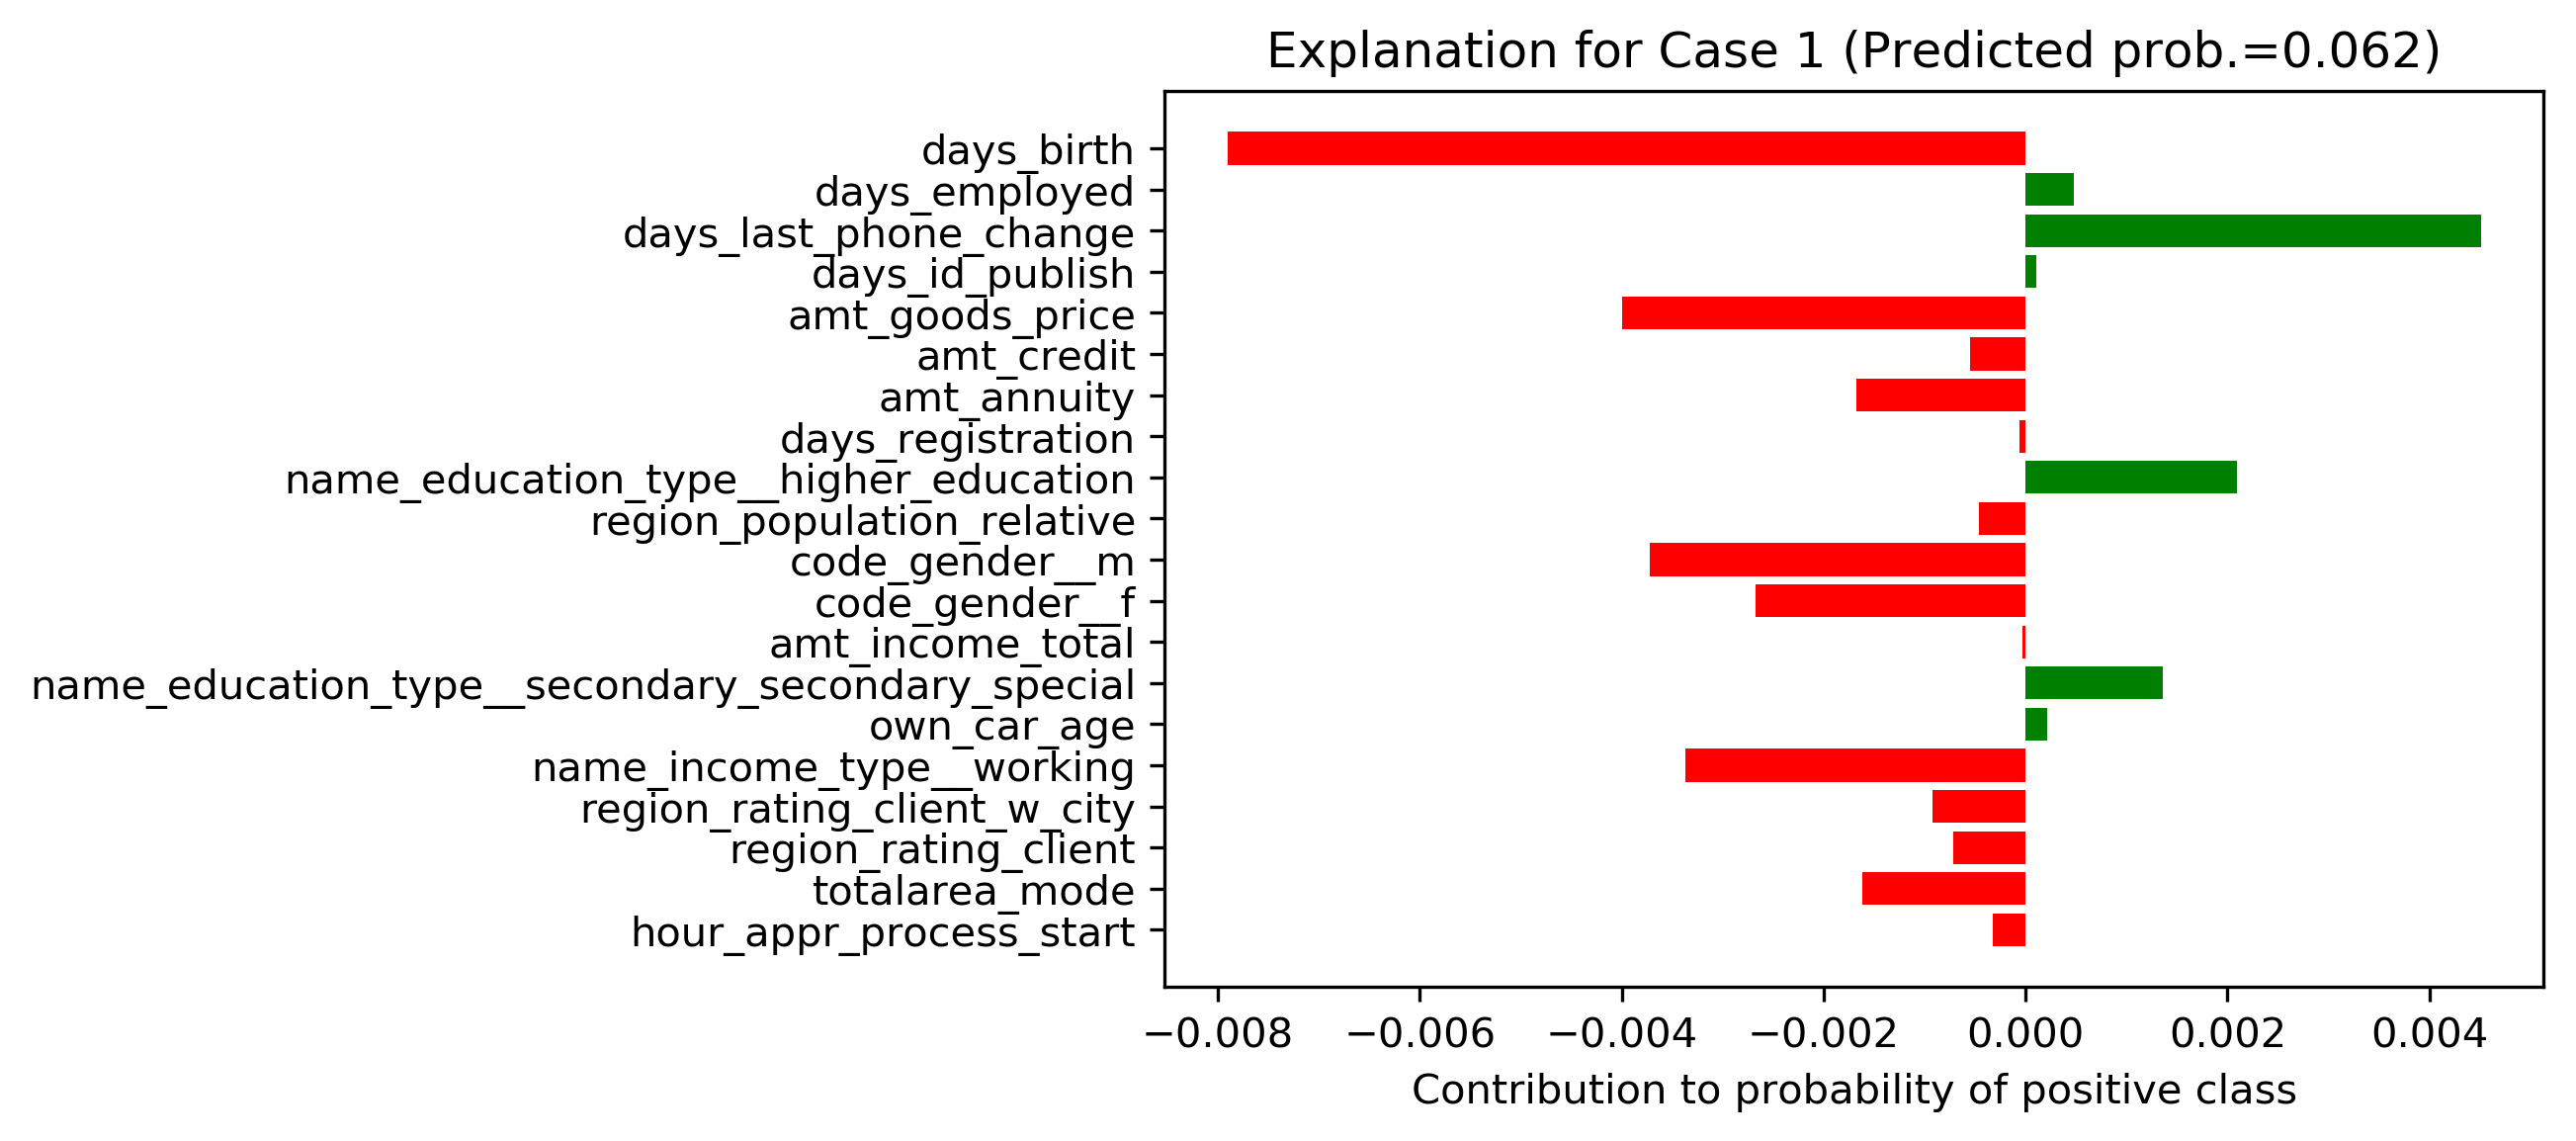

In [244]:
_ = as_pyplot_figure( tc_exps[1][:20], p0, X_train.columns[:20], 'Case 1'),

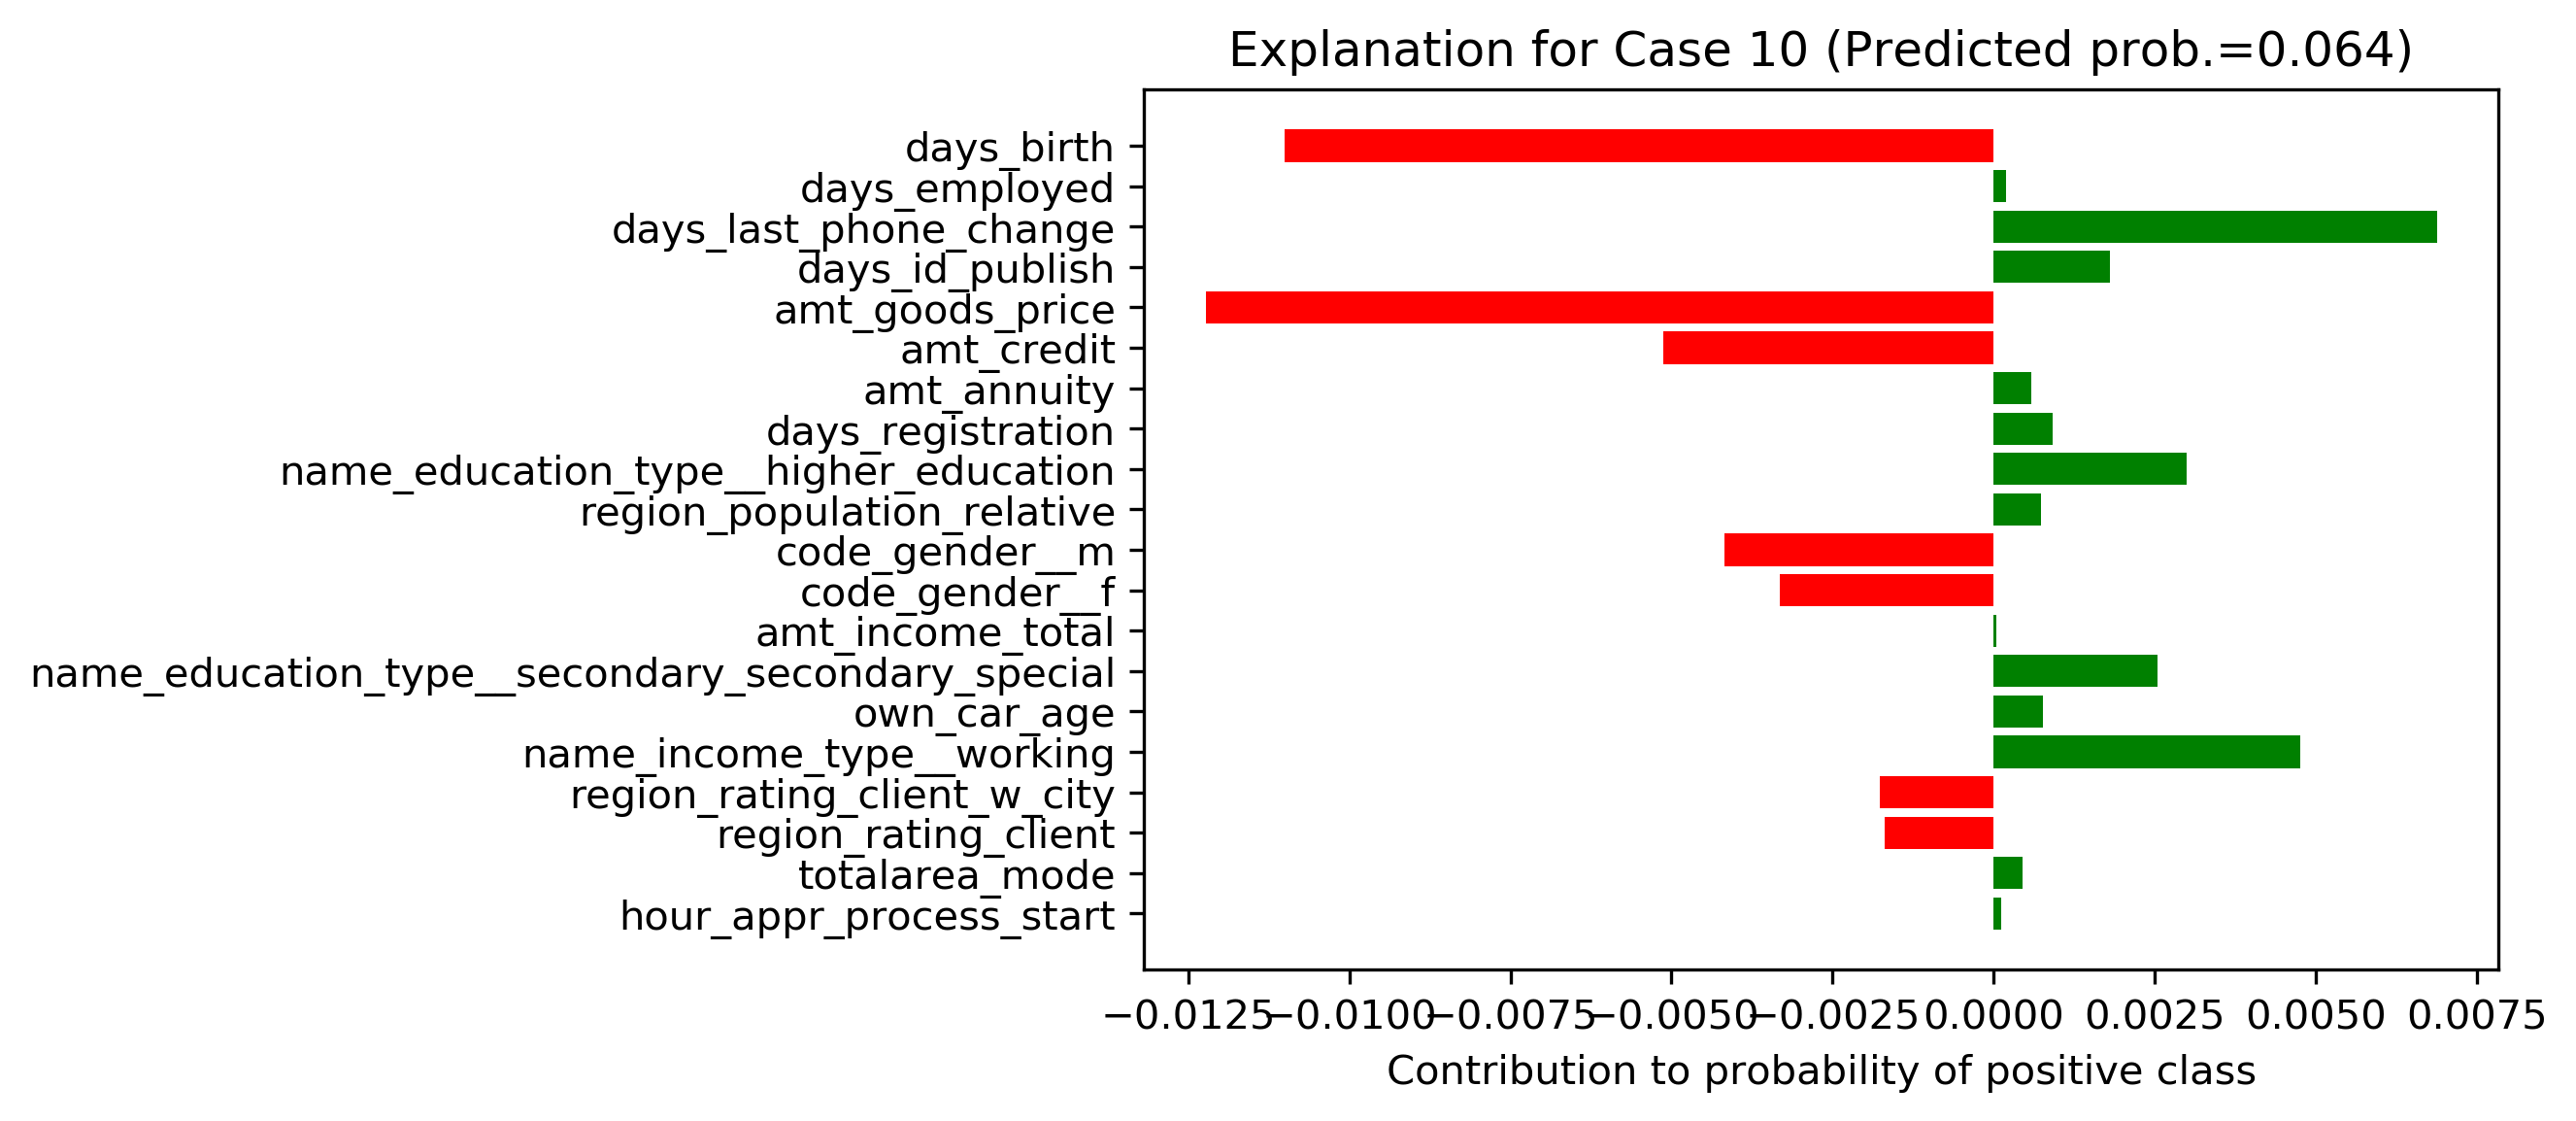

In [246]:
i = 10
_ = as_pyplot_figure( tc_exps[i][:20], p0, X_train.columns[:20], f'Case {i}')

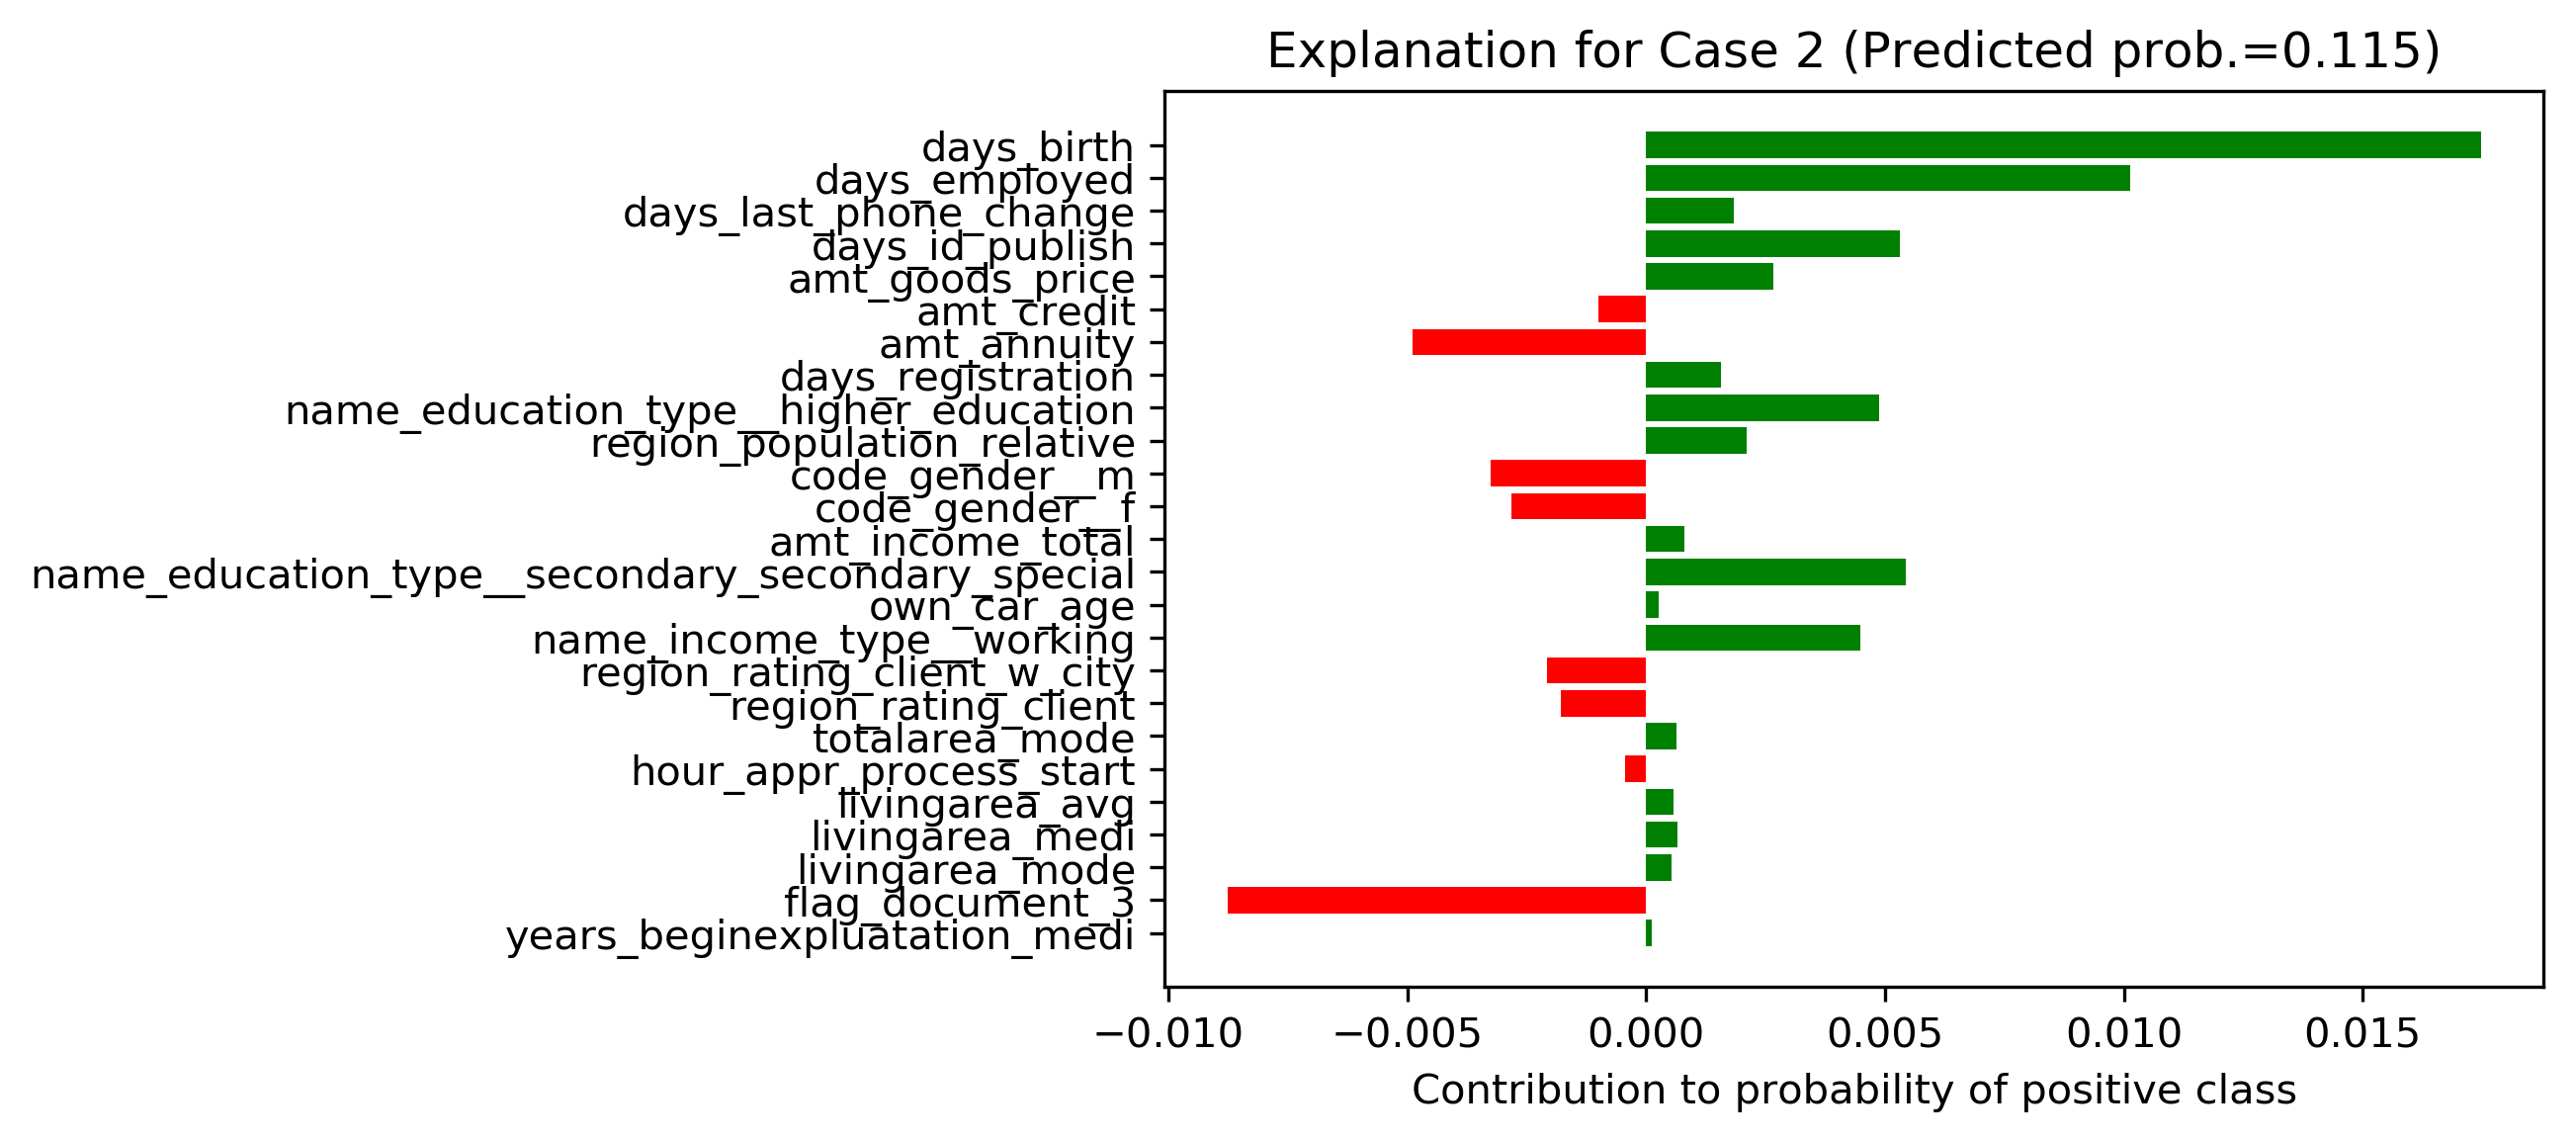

In [274]:
i =  2 # 98 # 147 #145 # 125 #296
_ = as_pyplot_figure( tc_exps[i][:25], p0, X_train.columns[:25], f'Case {i}')

In [251]:
import numpy as np

In [255]:
 (tc_exps.sum( axis=1)  + p0).shape, y_train.shape

((1000,), (246008,))

In [261]:
pred0 = tc_exps.sum( axis=1)  + p0
np.argmax( pred0 )

296

In [262]:
pred0[296]

0.24227905251369716

In [271]:

rfc1.predict_proba( X_train.iloc[[i], :]), y_train.iloc[i]

(array([[0.83733868, 0.16266132]]), 0)

In [268]:
for arr in np.vstack( [ range(1000), tc_exps.sum( axis=1)  + p0, y_train[:1000] ] ).transpose() : 
    print( arr )

[0.        0.1144148 0.       ]
[1.         0.04682238 0.        ]
[2.         0.10783017 1.        ]
[3.         0.03912963 0.        ]
[4.         0.03825541 0.        ]
[5.         0.05884773 0.        ]
[6.         0.13918099 0.        ]
[7.         0.10163822 0.        ]
[8.         0.05952999 0.        ]
[9.         0.05135524 0.        ]
[10.         0.0728551  0.       ]
[11.          0.10551851  1.        ]
[12.          0.07369306  0.        ]
[13.          0.12867246  0.        ]
[14.          0.09020546  1.        ]
[15.          0.07453772  0.        ]
[16.          0.04050638  0.        ]
[17.          0.09428407  0.        ]
[18.          0.04688526  0.        ]
[19.          0.04994455  0.        ]
[20.          0.03850953  0.        ]
[21.          0.08247124  0.        ]
[22.          0.06899801  0.        ]
[23.          0.04300207  0.        ]
[24.          0.04555208  0.        ]
[25.          0.04700289  0.        ]
[26.          0.05772683  0.        ]
[27.      